This notebook investigates the alexnet-based model with 8-augmentation with an extra convolutional layer with 192 output channels (as in the original paper by Krizhevsky et al). 

When training the model, we saved both files from the best and most recent epoch. First plot the most recent file, to see the evolution of parameters.

In [1]:
import pylearn2.utils
import pylearn2.config
import theano
import neukrill_net.dense_dataset
import neukrill_net.utils
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import holoviews as hl
%load_ext holoviews.ipython
import sklearn.metrics

Using gpu device 0: Tesla K40c
:0: FutureWarning: IPython widgets are experimental and may change in the future.


Welcome to the HoloViews IPython extension! (http://ioam.github.io/holoviews/)
Available magics: %compositor, %opts, %params, %view, %%labels, %%opts, %%view


In [2]:
m = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/alexnet_based_extra_convlayer.pkl.recent")

Curve.Curve.valid_objective   (y)
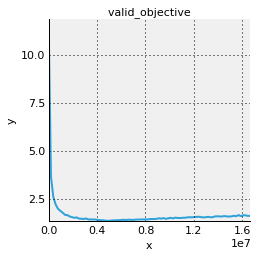

In [9]:
channel = m.monitor.channels["valid_objective"]
hl.Curve(zip(channel.example_record,channel.val_record),label="valid_objective")

In [38]:
def make_curves(model, *args):
    curves = None
    for c in args:
        channel = m.monitor.channels[c]
        c = c[0].upper() + c[1:]
        if not curves:
            curves = hl.Curve(zip(channel.example_record,channel.val_record),group=c)
        else:
            curves += hl.Curve(zip(channel.example_record,channel.val_record),group=c)
    return curves

Valid_objective
      I : Curve.Valid_objective   (y)
   Valid_y_nll    
      I : Curve.Valid_y_nll   (y)
   Train_y_nll    
      I : Curve.Train_y_nll   (y)
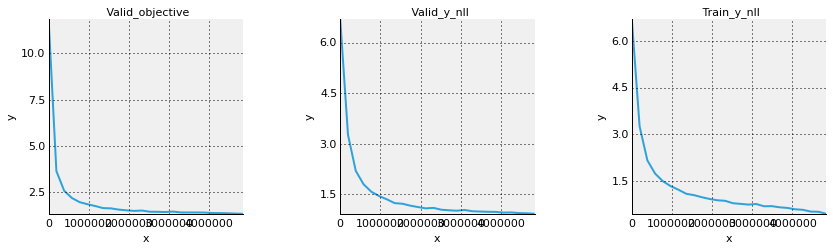

In [39]:
make_curves(m,"valid_objective","valid_y_nll","train_y_nll")

The graph keeps going down for the `train_y_nll` while it is sort of stable and slightly sloping upwards for `valid_y_nll` and `valid_objective`. We think it suggests that we are overfitting.

Let's now see the best parameter values.

In [31]:
m = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/alexnet_based_extra_convlayer.pkl")

Holoviews appears to be letting me down below. The plot for `Train_y_nll` appears to show it going down to zero due to it cutting off the bottom of the y axis...

Valid_y_nll    
      I : Curve.Valid_y_nll   (y)
   Valid_objective
      I : Curve.Valid_objective   (y)
   Train_y_nll    
      I : Curve.Train_y_nll   (y)
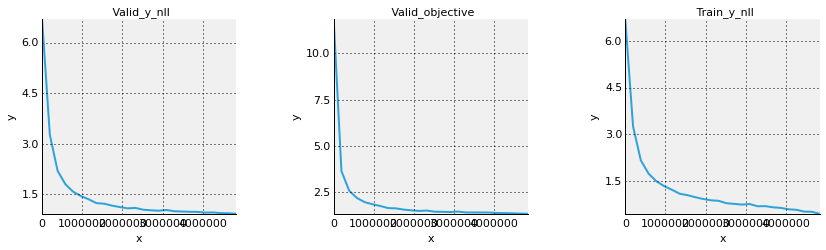

In [32]:
make_curves(m,"valid_y_nll","valid_objective","train_y_nll")

The scale of the graphs is 10^6 not 10^7, so supposedly this is the best value of `valid_objective` before we started overfitting.

Let's now see what score we get with the best parameter values from this model.

In [5]:
cd ..

/afs/inf.ed.ac.uk/user/s13/s1320903/Neuroglycerin/neukrill-net-work


In [6]:
%run check_test_score.py -v run_settings/alexnet_based_extra_convlayer.json

Loading settings..
Loading model...
Loading data...
Applying normalisation: global
Finding batch size...
    chosen batch size 3089 for 8 batches
Compiling forward prop...
Making predictions...
    Batch 1 of 8
    Batch 2 of 8
    Batch 3 of 8
    Batch 4 of 8
    Batch 5 of 8
    Batch 6 of 8
    Batch 7 of 8
    Batch 8 of 8
Collapsing predictions...
Log loss: 0.805021153139


Looks like a better score than the current best! Let's submit it to the leaderboard. Write a submisstion file:

In [8]:
!python test.py -v run_settings/alexnet_based_extra_convlayer.json

Using gpu device 1: Tesla K40c
Loading model...
Loading data...
Compiling Theano function...
Processing batch 1 of 256
Processing batch 2 of 256
Processing batch 3 of 256
Processing batch 4 of 256
Processing batch 5 of 256
Processing batch 6 of 256
Processing batch 7 of 256
Processing batch 8 of 256
Processing batch 9 of 256
Processing batch 10 of 256
Processing batch 11 of 256
Processing batch 12 of 256
Processing batch 13 of 256
Processing batch 14 of 256
Processing batch 15 of 256
Processing batch 16 of 256
Processing batch 17 of 256
Processing batch 18 of 256
Processing batch 19 of 256
Processing batch 20 of 256
Processing batch 21 of 256
Processing batch 22 of 256
Processing batch 23 of 256
Processing batch 24 of 256
Processing batch 25 of 256
Processing batch 26 of 256
Processing batch 27 of 256
Processing batch 28 of 256
Processing batch 29 of 256
Processing batch 30 of 256
Processing batch 31 of 256
Processing batch 32 of 256
Processing batch 33 of 256
Processing batch 34 of 25

Copy the file to your local machine:

In [ ]:
scp s1320903@stonesoup:/disk/scratch/neuroglycerin/submissions/alexnet_based_extra_convlayer.csv.gz /home/aselega/Neuroglycerin/submissions/

And now we are ready to submit it.